# 1<sup>η</sup> Εργαστηριακή Άσκηση
## Ανάλυση & Μελέτη Σύνθετων Τοπολογιών Δικτύου

<p style='text-align: justify;'> Στην παρούσα άσκηση θα δημιουργηθούν και θα αναλυθούν τοπολογίες, ορισμένες από τις οποίες χρησιμοποιούνται για την αναπαράσταση σύνθετων ή/και κοινωνικών δικτύων. Η ανάλυση θα γίνει μέσω των μετρικών ανάλυσης που παρουσιάστηκαν στις διαλέξεις του μαθήματος. Τα δίκτυα που θα μελετηθούν δίνονται στον Πίνακα 1.</p>

<table width="80%">
    <caption>Πίνακας $1$: Σύνθετα δίκτυα και χαρακτηριστικές παράμετροι</caption>
    <thead>
    <tr>
        <th>Τύπος Δικτύου</th>
        <th>Μοντέλο</th>
        <th>Αναγνωριστικό</th>
        <th>Παράμετροι</th>
    </tr>
    </thead>
    <tbody>
        <tr>
            <td style="background-color:#F2F4F7" rowspan="2">Πλέγμα</td>
            <td style="background-color:#F2F4F7" rowspan="2">Πεπερασμένο</td>
            <td style="background-color:#F2F4F7" rowspan="2">REG</td>
            <td style="background-color:#F2F4F7">Κόμβοι $n$</td>   
        </tr>
        <tr>
            <td style="background-color:#F2F4F7">Bαθμός $d$</td>
        </tr>
        <tr>
            <td style="background-color:#FFFFFF" rowspan="2">Τυχαίος γραφος</td>
            <td style="background-color:#FFFFFF" rowspan="2">Erdos-Renyi</td>
            <td style="background-color:#FFFFFF" rowspan="2">RG (ER)</td>
            <td style="background-color:#FFFFFF">Κόμβοι $n$</td>   
        </tr>
        <tr>
            <td style="background-color:#FFFFFF">Συνδέσεις $M$</td>
        </tr>
        <tr>
            <td style="background-color:#F2F4F7" rowspan="2">Τυχαίος γράφος</td>
            <td style="background-color:#F2F4F7" rowspan="2">Gilbert</td>
            <td style="background-color:#F2F4F7" rowspan="2">RG (G)</td>
            <td style="background-color:#F2F4F7">Κόμβοι $n$</td>   
        </tr>
        <tr>
            <td style="background-color:#F2F4F7">Πιθανότητα σύνδεσης $p$</td>
        </tr>
        <tr>
            <td style="background-color:#FFFFFF" rowspan="3">Τυχαίος γεωμετρικός γράφος</td>
            <td style="background-color:#FFFFFF" rowspan="3">Επίπεδος</td>
            <td style="background-color:#FFFFFF" rowspan="3">RGG</td> 
        </tr>
        <tr>
            <td style="background-color:#FFFFFF" >Ακτίνα $R$</td>
        </tr>
        <tr>
            <td style="background-color:#FFFFFF">Κόμβοι $n$</td>  
        </tr>
        <tr>
            <td style="background-color:#F2F4F7" rowspan="2">Scale-free</td>
            <td style="background-color:#F2F4F7" rowspan="2">Barabasi-Albert</td>
            <td style="background-color:#F2F4F7" rowspan="2">SF (BA)</td>
            <td style="background-color:#F2F4F7">Κόμβοι $n$</td>   
        </tr>
        <tr>
            <td style="background-color:#F2F4F7">Παράμετρος επισύναψης $d$</td>
        </tr>
        <tr>
            <td style="background-color:#FFFFFF" rowspan="3">Small-world</td>
            <td style="background-color:#FFFFFF" rowspan="3">Watts-Strogatz</td>
            <td style="background-color:#FFFFFF" rowspan="3">SW (WS)</td>
            <td style="background-color:#FFFFFF">Κόμβοι $n$ </td>   
        </tr>
        <tr>
            <td style="background-color:#FFFFFF" >Βαθμός αρχικού πλέγματος $d$</td>
        </tr>
        <tr>
            <td style="background-color:#FFFFFF">Πιθανότητα ανασύνδεσης $g_p$</td>  
        </tr>
    </tbody>
</table>

In [1]:
seedno = 600    #seed number !DO NOT CHANGE IT!

In [2]:
%matplotlib inline
# import matplotlib
import networkx as nx
import matplotlib.pyplot as plt
import statistics
import itertools
import collections
import numpy as np
import random

## Α. Κατασκευή και οπτικοποίηση σύνθετων τύπων δικτύου

### Τοπολογία REG για βαθμό πλέγματος $d = 4$

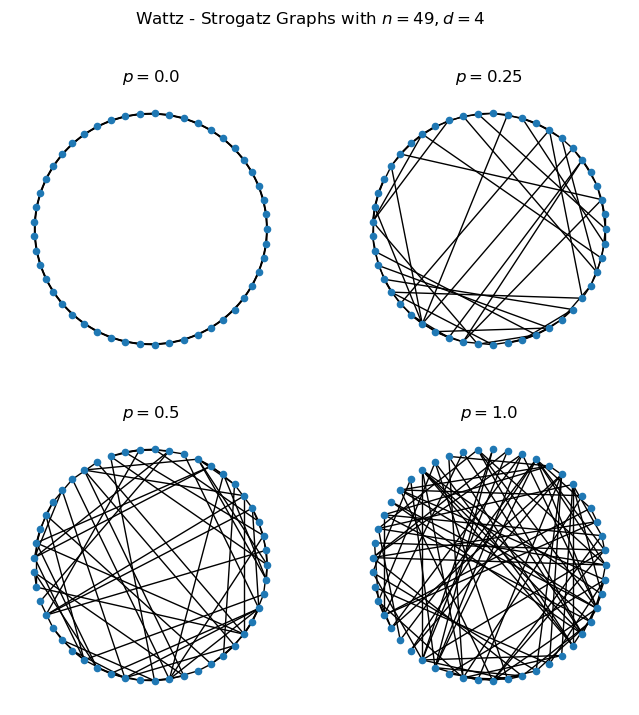

In [3]:
# random.seed(seedno)
#n=4x μέγεθος δικτύου: αντικαταστήστε το x με το τελευταίο ψηφίο του αριθμού μητρώου σας.
n = 49
d = 4
# για την κατασκευή του REG χρησιμοποιήστε την watts_strogatz_graph από το networkx. 
# Επιλέξτε προσεκτικά την τιμή της παραμέτρου p. 
#uncomment REG= 
#οπτικοποίηση: χρησιμοποιήστε την draw_circular από το networkx

ps = (0.0, 0.25, 0.5, 1.0)
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

for p, ax in zip(ps, axs.flat):
    REG = nx.watts_strogatz_graph(n=n, k=d, p=p, seed=seedno)
    nx.draw_circular(REG, node_size=20, ax=ax)
    ax.set_title(f'$p = {p}$')
    
fig.suptitle(f'Wattz - Strogatz Graphs with $n = {n}, d = {d}$')
plt.show()

REG = nx.watts_strogatz_graph(n=n, k=d, p=0.25, seed=seedno)

### Τοπολογία RG (ER) για αριθμό συνδέσεων $M = 150$

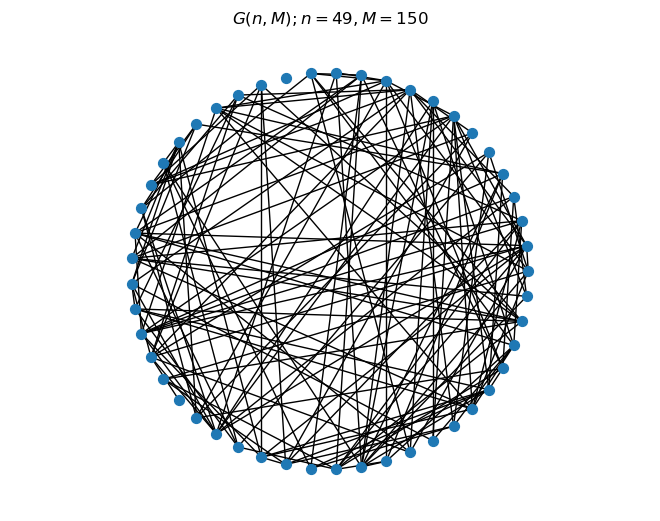

In [4]:
# random.seed(seedno)
#n=4x 
n = 49
M = 150

# για την κατασκευή του RGER χρησιμοποιήστε την gnm_random_graph από το networkx
#uncomment RGER= 

# οπτικοποίηση: χρησιμοποιήστε την draw_circular από το networkx

RGER = nx.gnm_random_graph(n=n, m=M, seed=seedno)
nx.draw_circular(RGER, node_size=50)
plt.title(f'$G(n, M); n = {n}, M = {M}$')
plt.axis('equal')
plt.show()

### Τοπολογία RGG  με ακτίνα σύνδεσης $R=0.35$

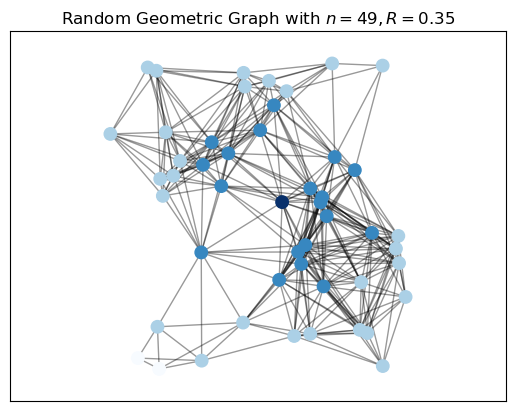

In [5]:
# random.seed(seedno)
# n=4x
n = 49
R = 0.35

# για την κατασκευή του RGG χρησιμοποιήστε την random_geometric_graph από το networkx
#uncomment RGG=

#οπτικοποίηση: https://networkx.org/documentation/stable/auto_examples/drawing/plot_random_geometric_graph.html

RGG = nx.random_geometric_graph(n=n, radius=R, seed=seedno)
pos = nx.get_node_attributes(RGG, 'pos')
central = min(pos, key=lambda i: (pos[i][0] - 0.5)**2 + (pos[i][1] - 0.5)**2)
dists = nx.single_source_shortest_path_length(RGG, central)

nx.draw_networkx_edges(RGG, pos=pos, alpha=0.4)
nx.draw_networkx_nodes(RGG, pos=pos, nodelist=list(dists), node_color=list(dists.values()), cmap=plt.cm.Blues_r, node_size=80)
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.title(f'Random Geometric Graph with $n = {n}, R = {R}$')
plt.axis('equal')
plt.show()

### Τοπολογία SF με παράμετρο επισύναψης $d=4$

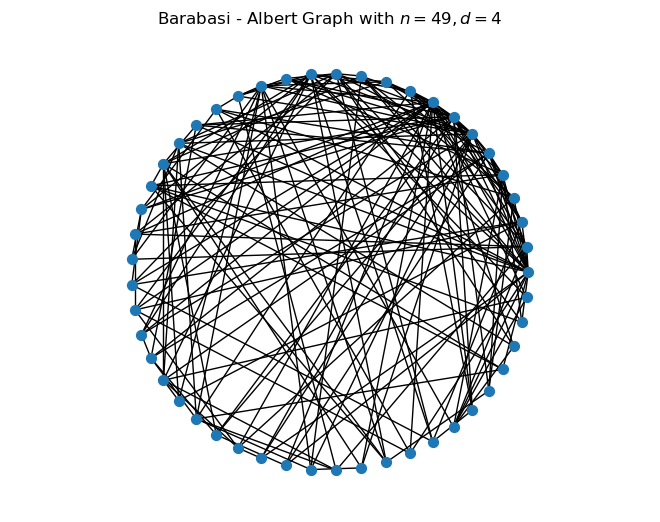

In [6]:
# random.seed(seedno)
#n=4x
n = 49
d = 4

# για την κατασκευή του SF χρησιμοποιήστε την barabasi_albert_graph από το networkx
#uncomment SF= 
#οπτικοποίηση: χρησιμοποιήστε την draw_circular από το networkx

SF = nx.barabasi_albert_graph(n=n, m=d, seed=seedno)
nx.draw_circular(SF, node_size=50)
plt.title(f'Barabasi - Albert Graph with $n = {n}, d = {d}$')
plt.axis('equal')
plt.show()

### Τοπολογία SW με βαθμό αρχικού πλέγματος $d=4$ και πιθανότητα ανασύνδεσης $p=0.25$

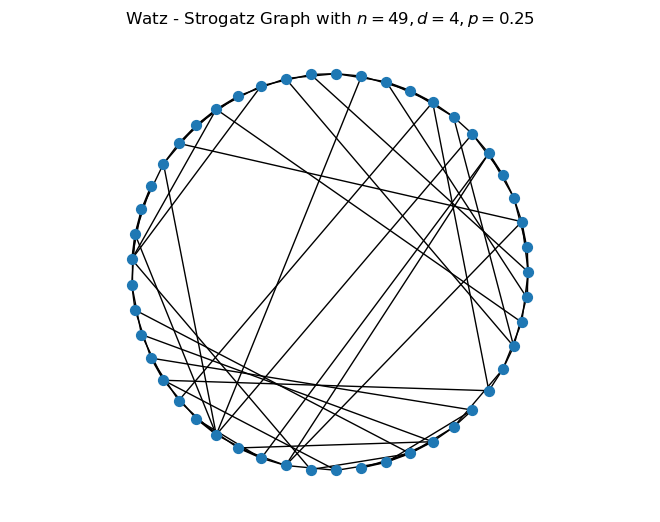

In [7]:
# random.seed(seedno)
#n=4x
n = 49
d = 4
p = 0.25

# για την κατασκευή του SW χρησιμοποιήστε την watts_strogatz_graph από το networkx. 
#uncomment SW= 

#οπτικοποίηση: χρησιμοποιήστε την draw_circular από το networkx

SW = nx.watts_strogatz_graph(n=n, k=d, p=p, seed=seedno)
nx.draw_circular(SW, node_size=50)
plt.title(f'Watz - Strogatz Graph with $n = {n}, d = {d}, p = {p}$')
plt.axis('equal')
plt.show()

## B. Μετρικές δικτύου

### B1. Συντελεστής ομαδοποίησης (Clustering coefficient)

#### Για κάθε μια από τις τοπολογίες REG, RG(ER), RGG, SF(BA) και SW(WS):
#### Β1.1 Να υπολογιστεί ο συντελεστής ομαδοποίησης κάθε κόμβου και να αναπαρασταθεί η κατανομή του.
#### Β1.2  Να υπολογιστεί ο μέσος συντελεστής ομαδοποίησης και η διασπορά του.
#### Β.1.3 Να βρεθούν οι κόμβοι με το μικρότερο και το μεγαλύτερο συντελεστή ομαδοποίησης. 
#### Να σχολιαστούν τα αποτελέσματα.

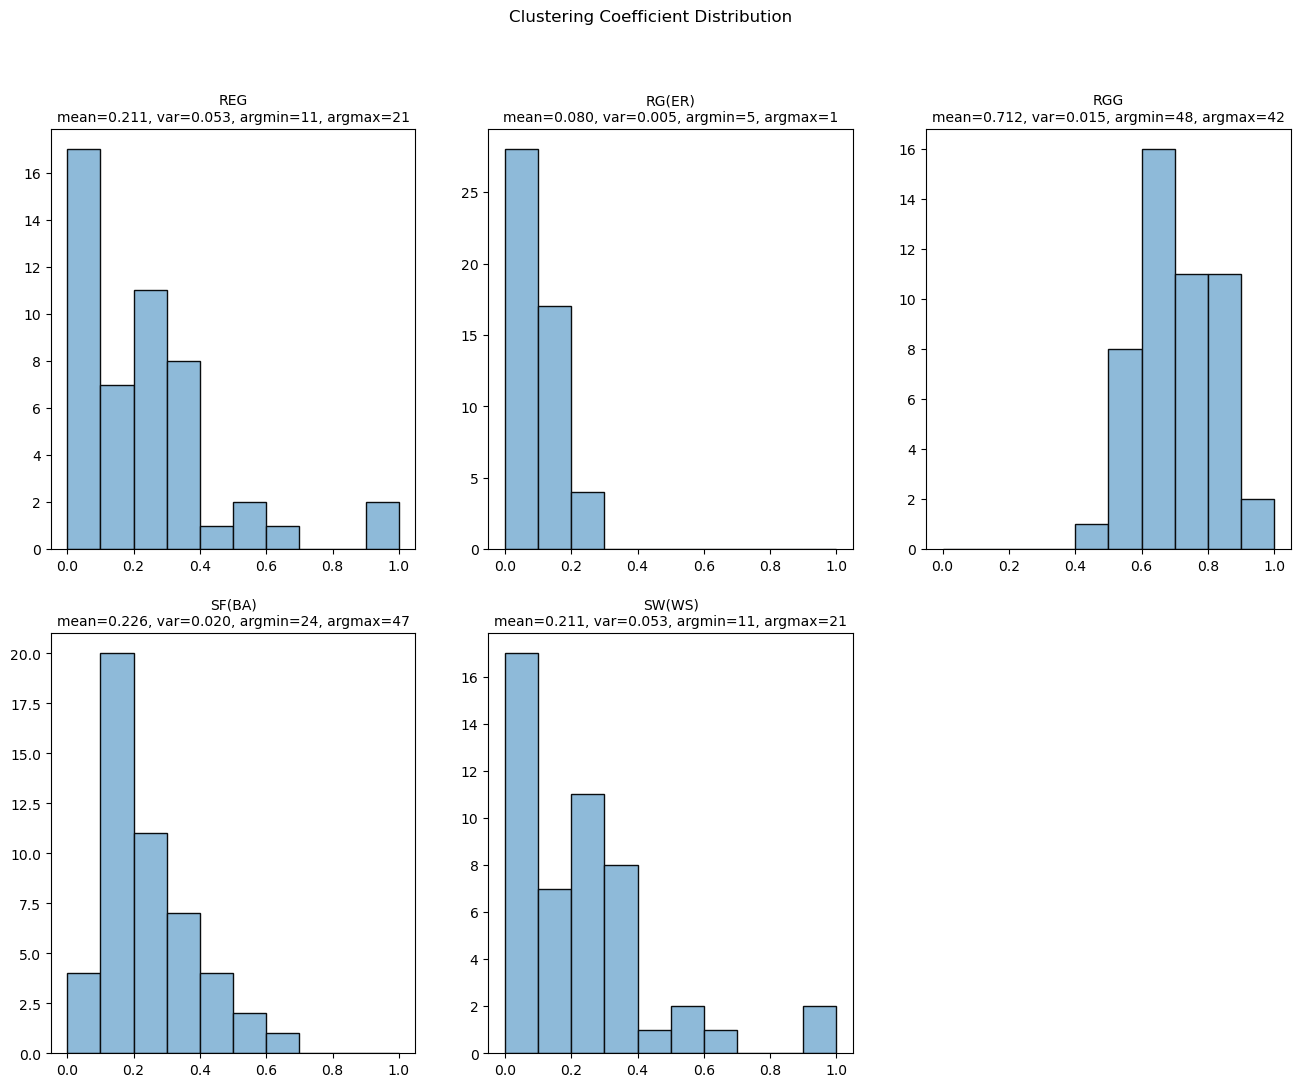

In [8]:
def plot_clustering_coefficient_distribution(G, name, nbins=10, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    
    cc = nx.clustering(G)
    mean = statistics.mean(cc.values())
    var = statistics.variance(cc.values())
    argmin = min(cc, key=cc.get)
    argmax = max(cc, key=cc.get)
    
    ax.hist(cc.values(), bins=np.linspace(0, 1, nbins + 1), ec='#090c0e', fc='#8ebad9')
    ax.set_title(f'{name}\nmean={mean:.3f}, var={var:.3f}, argmin={argmin}, argmax={argmax}', fontsize=10)
    
    
graphs = {'REG': REG, 'RG(ER)': RGER, 'RGG': RGG, 'SF(BA)': SF, 'SW(WS)': SW}
fig, axs = plt.subplots(2, 3, figsize=(16, 12), )

for (name, G), ax in zip(graphs.items(), axs.flat):
    plot_clustering_coefficient_distribution(G, name, ax=ax)

axs[-1, -1].set_axis_off()
fig.suptitle("Clustering Coefficient Distribution")

plt.show()

### Β2. Μέσο μήκος μονοπατιού - Διάμετρος - Ακτίνα γράφου

#### Για κάθε μια από τις τοπολογίες REG, RG(ER), RGG, SF(BA) και SW(WS):
#### Β2.1 Nα υπολογιστεί το μέσο μήκος μονοπατιού και η διασπορά του. Προτείνεται η χρήση της συνάρτησης  all_pairs_shortest_path_length του networkx.
#### B2.2 Να υπολογιστεί η διάμετρος (συνάρτηση diameter) και η ακτίνα (συνάρτηση radius).
#### Για τα παραπάνω πραγματοποιήστε συγκρίσεις και εξηγήστε με βάση τα χαρακτηριστικά της κάθε τοπολογίας όπως παρουσιάζονται στη θεωρία.

In [24]:
def path_metrics(G):
    shortest_paths = dict(nx.all_pairs_shortest_path_length(G))
    path_lengths = [
        length
        for source, lengths in shortest_paths.items()
        for target, length in lengths.items()
        if source != target
    ]
    mean = statistics.mean(path_lengths)
    var = statistics.variance(path_lengths)
    
    try:
        eccentricities = nx.eccentricity(G, sp=shortest_paths)
    except nx.NetworkXError:
        # In our case, it's because the graph is disconnected
        radius = None
        diameter = None
    else:
        radius = nx.radius(G, eccentricities)
        diameter = nx.diameter(G, eccentricities)
    
    
    return dict(mean=mean, var=var, radius=radius, diameter=diameter)


{name: path_metrics(G) for name, G in graphs.items()}

{'REG': {'mean': 3.1683673469387754,
  'var': 1.2953324247606317,
  'radius': 4,
  'diameter': 6},
 'RG(ER)': {'mean': 2.2349290780141846,
  'var': 0.4760477111540941,
  'radius': None,
  'diameter': None},
 'RGG': {'mean': 2.1301020408163267,
  'var': 0.8652440559379856,
  'radius': 3,
  'diameter': 5},
 'SF(BA)': {'mean': 2.063775510204082,
  'var': 0.3676876535386592,
  'radius': 2,
  'diameter': 4},
 'SW(WS)': {'mean': 3.1683673469387754,
  'var': 1.2953324247606317,
  'radius': 4,
  'diameter': 6}}

#### B.2.3 Για κάθε τοπολογία, ποιος κόμβος συνδέεται με τους περισσότερους κόμβους με μήκος ελάχιστου μονοπατιού ίσο με τη διάμετρο της τοπολογίας?

In [25]:
# να προσδιοριστεί το label του κόμβου και το σύνολο των κόμβων 
# με τους οποίους συνδέεται με μήκος ελάχιστου μονοπατιού ΄ίσο με τη διάμετρο. 


def most_opposites(G):
    shortest_paths = dict(nx.all_pairs_shortest_path_length(G))
    
    try:
        eccentricities = nx.eccentricity(G, sp=shortest_paths)
    except nx.NetworkXError:
        return None
    
    diameter = nx.diameter(G, eccentricities)
    
    diametrically_opposite = collections.defaultdict(list)
    for source, lengths in shortest_paths.items():
        for target, length in lengths.items():
            if length == diameter:
                diametrically_opposite[source].append(target)

    max_num_opposite = max(map(len, diametrically_opposite.values()))
    best = {source: targets for source, targets in diametrically_opposite.items() if len(targets) == max_num_opposite}

    return best


{name: most_opposites(G) for name, G in graphs.items()}

{'REG': {38: [9, 10, 11, 12]},
 'RG(ER)': None,
 'RGG': {42: [30, 39]},
 'SF(BA)': {25: [37], 37: [25]},
 'SW(WS)': {38: [9, 10, 11, 12]}}

#### Περιφέρεια του γράφου ορίζεται να είναι το σύνολο των κόμβων του που έχουν εκκεντρότητα ίση με τη διάμετρό του. 
#### Κέντρο του γράφου ορίζεται να είναι το σύνολο των κόμβων του που έχουν εκκεντρότητα ίση με την ακτίνα του.  
#### Β.2.4 Για κάθε τοπολογία, να βρεθεί η περιφέρεια και το κέντρο της και να σχολιαστούν τα αποτελέσματα.

In [22]:
def periphery_and_center(G):
    try:
        eccentricities = nx.eccentricity(G)
    except nx.NetworkXError:
        return None
    periphery = nx.periphery(G, eccentricities)
    center = nx.center(G, eccentricities)
    return dict(periphery=periphery, center=center)


{name: periphery_and_center(G) for name, G in graphs.items()}

{'REG': {'periphery': [1, 3, 9, 10, 11, 12, 21, 26, 38, 39, 48],
  'center': [24, 30, 34, 47]},
 'RG(ER)': None,
 'RGG': {'periphery': [30, 39, 42],
  'center': [6, 9, 15, 21, 25, 28, 31, 40, 46, 47, 48]},
 'SF(BA)': {'periphery': [25, 37], 'center': [0, 6, 7, 15]},
 'SW(WS)': {'periphery': [1, 3, 9, 10, 11, 12, 21, 26, 38, 39, 48],
  'center': [24, 30, 34, 47]}}

## Γ) Mετρικές κεντρικότητας κόμβων

### Γ1. Κεντρικότητα βαθμού (Degree centrality)
##### Γ1.1 Να αναπαρασταθεί η κατατανομή βαθμών κόμβων για κάθε τοπολογία.
##### Γ1.2 Να υπολογιστεί ο μέσος βαθμός κόμβου καθώς και η διασπορά των βαθμών κόμβου για κάθε τοπολογία.
##### Να σχολιαστούν τα αποτελέσματα.

In [14]:
def find_degree(G):
    pass

### Γ2. Κεντρικότητα εγγύτητας (Closeness centrality)
##### Γ2.1 Να αναπαρασταθεί η κατατανομή της εγγύτητας κόμβων για κάθε τοπολογία.
##### Γ2.2 Να υπολογιστεί η μέση εγγύτητα καθώς και η διασπορά της για κάθε τοπολογία.
##### Να σχολιαστούν τα αποτελέσματα.

In [15]:
def find_closeness(G):
    pass

### Γ3. Ενδιαμεσική κεντρικότητα (Betweenness centrality)
##### Γ3.1 Να αναπαρασταθεί η κατατανομή της ενδιαμεσικής κεντρικότητας κόμβων για κάθε τοπολογία.
##### Γ3.2 Να υπολογιστεί η μέση ενδιαμεσική κεντρικότητα καθώς και η διασπορά της για κάθε τοπολογία.
##### Να σχολιαστούν τα αποτελέσματα.

In [16]:
def find_betweenness(G):
    pass

### Γ4. Kεντρικότητα Katz
##### Γ4.1 Να αναπαρασταθεί η κατανομή της κεντρικότητας Katz των κόμβων για κάθε τοπολογία. 
Για τον προσδιορισμό της παραμέτρου $alpha$ της συνάρτησης katz_centrality,  να υπολογιστεί η μεγαλύτερη ιδιοτιμή $λ_{max}$ του πίνακα γειτνίασης με τη συνάρτηση adjacency_spectrum του networkx. 
H $alpha$ ορίζεται να είναι ιση με $\frac{1}{λ_{max}}-0.01$.
##### Γ4.2 Να υπολογιστεί η μέση  κεντρικότητα Katz  καθώς και η διασπορά της για κάθε τοπολογία.
##### Να σχολιαστούν τα αποτελέσματα.

In [17]:
def find_katz(G):
    pass

#### Να προσδιοριστούν, για κάθε τοπολογία, οι πιο κεντρικοί κόμβοι ως προς το βαθμό, την εγγύτητα, την ενδιαμεσική κεντρικότητα και την κεντρικότητα Katz. Να σχολιαστούν τα αποτελέσματα.

In [18]:
def find_central(G):
    pass

### Γ5. Αλγόριθμος PageRank σε πραγματικό δίκτυο
#####  Να εκτελεστεί ο αλγόριθμος pagerank στην 41η μεγαλύτερη συνδεδεμένη συνιστώσα (index=40) του κατευθυνόμενου δίκτυου web-Stanford του οποίου οι ακμές δίνονται στο αρχείο web-Standord.txt. 
##### Για να υπολογίσετε τις συνδεδεμένες συνιστώσες, χρησιμοποιήστε τη συνάρτηση weakly_connected_components του networkx.
Περισσότερες πληροφορίες για το dataset δίνονται στο link https://snap.stanford.edu/data/web-Stanford.html.
##### Να σχολιαστούν τα αποτελέσματα.

In [19]:
#uncomment G_web=nx.read_edgelist("web-Stanford.txt",create_using=nx.DiGraph())

In [20]:
#find the 40th largest weakly connected component of the graph web-Stanford
#G40 = 

In [21]:
#pagerank

### Δ) Μελέτη συνεκτικότητας και ευρωστία (robustness) δικτύων 

### Δ1. Μελέτη συνεκτικότητας
Για κάθε τύπο σύνθετου δικτύου, ορίζεται το ποσοστό συνεκτικότητας για έναν αριθμό παραγόμενων τοπολογιών, ως κλάσμα των συνδεδεμένων τοπολογιών σε σχέση με τον αριθμό όλων των παραγόμενων τοπολογιών.

Με βάση τις τιμές παραμέτρων του Πίνακα 2, μελετήστε τη συνεκτικότητα κάθε τύπου σύνθετου δικτύου του Πίνακα 1.

<table>
    <thead>
        <tr>
            <th>Τοπολογία</th>
            <th>Εύρος Παραμέτρων</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td >REG</td>
            <td rowspan=6>$n = \{100, 200\}$</td>
            <td>$d \in [2,10]$ με βήμα $2$</td>
        </tr>
        <tr>
            <td>RGER</td>
            <td>$M \in [100,800]$ με βήμα $100$</td>
        </tr>
        <tr>
            <td>RG-Gilbert</td>
            <td>$p \in [0.01,0.1]$ με βήμα $0.01$</td>
        </tr>
        <tr>
            <td>RGG</td>
            <td>$R \in [0.025,0.25]$ με βήμα $0.025$</td>
        </tr>
        <tr>
            <td>SF</td>
            <td>$d \in [2,10]$ με βήμα $2$</td>
        </tr>
        <tr>
            <td>SW</td>
            <td>$d \in [2,10]$ με βήμα $2$ και $g_p \in [0.1,0.7]$ με βήμα $0.1$</td>
        </tr>
    </tbody>
    <caption>Πίνακας 2</caption>
</table>

#### Δ1.1 Για κάθε έναν τύπο δικτύου, να παράξετε 100 διαφορετικές τοπολογίες και να παρουσιάσετε το διάγραμμα ποσοστού συνεκτικότητας σε σχέση με τις καθορισμένες παραμέτρους κάθε δικτύου.
#### Δ1.2 Σε ποιες περιπτώσεις εμφανίζονται φαινόμενα κατωφλίου;
#### Δ1.3 Ποιες είναι οι κρίσιμες τιμές για κάθε τύπο δικτύου οι οποίες οδηγούν σε μετάβαση φάσης (phase transitions);
#### Δ1.4 Ποιες μεταβάσεις φάσης είναι απότομες (sharp) και ποιες ομαλές (smooth);

In [22]:
print("Connectivity REG")

Connectivity REG


In [23]:
print("Connectivity RG Erdos-Renyi")

Connectivity RG Erdos-Renyi


In [24]:
print("Connectivity RG Gilbert")

Connectivity RG Gilbert


In [25]:
print("Connectivity RGG")

Connectivity RGG


In [26]:
print("Connectivity SF")

Connectivity SF


In [27]:
print("Connectivity SW") 

Connectivity SW


### Δ2. Μελέτη ευρωστίας δικτύου

#### Για κάθε μια από τις τοπολογίες REG, RG(ER), RGG, SF(BA) και SW(WS) που εξετάστηκαν στις ενότητες Β και Γ, να υπολογιστεί με τη συνάρτηση minimum_node_cut ο ελάχιστος αριθμός κόμβων που πρέπει να αφαιρεθούν για να προκύψει μη συνδεδεμένο δίκτυο. 
#### Να σχολιαστούν τα αποτελέσματα.

In [28]:
def find_cut(G):
    pass

### E) Μελέτη της εξελικτικής μετατροπής δικτύου REG σε δίκτυο SW και RGER

##### Μεταβάλλοντας την παράμετρο $g_p$ από $0$ έως $1$ με βήμα $0.1$της συνάρτησης που κατασκευάζει τοπολογίες SW μεγέθους $n=30x$ ( αντικαταστήστε το x με το τελευταίο ψηφίο του ΑΜ) με βαθμό αρχικού πλέγματος $d=4$, να βρείτε το μέσο μήκος μονοπατιού και το μέσο συντελεστή ομαδοποίησης. Πώς συμπεριφέρεται το παραγόμενο δίκτυο για $g_p = 0$, πώς για $g_p = 1$ και πώς για ενδιάμεσες τιμές $g_p \simeq 0.1 - 0.5$;

In [29]:
random.seed(seedno)
#n=30x
d=4

### Z) Αναγνώριση τύπου πραγματικού δικτύου 
##### Για το πραγματικό δίκτυο που δίνεται στο αρχείο got.txt  και αφορά στις αλληλεπιδράσεις των χαρακτήρων του Game of Thrones στον πρώτο κύκλο επεισοδίων (https://github.com/mathbeveridge/gameofthrones) να βρεθούν:</p>
<ol>
    <li>Η κατανομή του βαθμού κόμβου και ο μέσος βαθμός.</li>
    <li>Η κατανομή του συντελεστή ομαδοποίησης και ο μέσος συντελεστής ομαδοποίησης.</li>
    <li>Το μέσο μήκος μονοπατιού.</li>
</ol>
<p style=text-align:justify>Να οπτικοποιηθεί το δίκτυο. Να συγκριθούν τα αποτελέσματα σε σχέση με αυτά των συνθετικών τοπολογιών. Να χαρακτηρίσετε τον τύπο της τοπολογίας με βάση τους τύπους δικτύων που εξετάστηκαν στις ενότητες B, Γ.</p>

In [30]:
#read csv
import csv
G_got=nx.Graph() #the graph of the GOT characters
with open('got.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
            G_got.add_edge(row[0],row[1],weight=row[2])
            line_count += 1

#### Ποιοι ήταν οι 5 κεντρικότεροι χαρακτήρες του πρώτου κύκλου επεισοδίων ως προς το βαθμό, την εγγύτητα και την ενδιαμεσικότητα ? 